/var/folders/cp/sc97wyfj2fnb8yfcw3_z8ncw0000gn/T/ipykernel_1209/475766267.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
***********************************
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55       17850  United Kingdom  
1  2010-12-01 08:26:00       3.39       17850  United Kingdom  
2  2010-12-01 08:26:00       2.75       17850  United Kingdom  
3  2010-12-01 08:26:00       3.39       17850  United Kingdom  
4  2010-12-01 08:26:00       3.39       17850  United Kingdom  
****

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>, <Axes: >]], dtype=object)

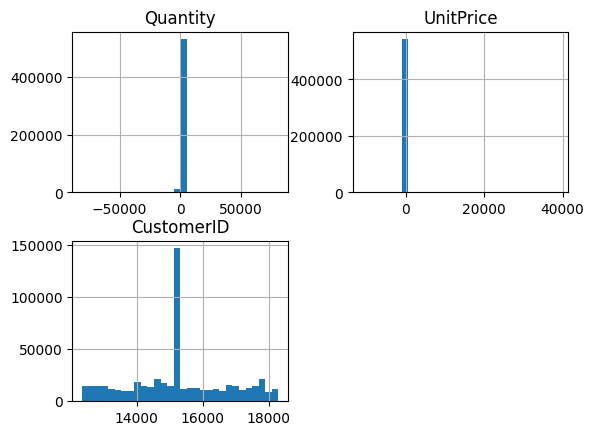

In [2]:
#Pulling in the dataset and looking at its values

import pandas as pd
dataframe = pd.read_csv("Online Retail.csv")

print(dataframe.keys())
print("***********************************")
print(dataframe.head())
print("***********************************")
dataframe.info()
print("***********************************")
print(dataframe["Description"].value_counts())
print(dataframe["Quantity"].value_counts())
print(dataframe["UnitPrice"].value_counts())
print(dataframe["Country"].value_counts())
print(dataframe["InvoiceDate"].value_counts())
print("***********************************")
print(dataframe.describe())
print("***********************************")
dataframe.hist(bins=30)

# Discoveries/Notes - Part 2

When taking a look at the types of data present in the dataset its interesting to see how many different items there are in the Description section. There are mayn items that seem to have been purchases thousands of times including "WHITE HANGING HEART T-LIGHT HOLDER" and "JUMBO BAG RED RETROSPOT" both with over 2000 purchases over a year span.

When looking at the Countries section its apparent that a good portion of the data came from United Kingdom, with a much smaller majority coming from other European and Asian countries. 

For price and amount section (UnitPrice and Quantity respectfully) there seem to be some values that are very out of place. For example the UnitPrice column contains a value of -11062.060000 which seems unreasonable and in the terms of transactions unlikely. Same with the Quantity section, the min value is -80995.000000 which doesn't seem possible either. These values will likely need removed so that we can properly look at the data. Another thing I noticed with the numerical data points is that the percentiles (25, 50, and 75) are all below or equal to 10, so I think those numbers mentioned above are definitely outliers. 

In terms of relations there don't seem to be any apparent relationships right now. It its interesting to note that for the CustomerID section of the histogram there seems to be one user that is present a considerably more in the data. This could be a large company purchases items or something along those lines. As I clean the data and perform more analysis I expect for more trend to emerge.



array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'UnitPrice'}>],
       [<Axes: title={'center': 'CustomerID'}>, <Axes: >]], dtype=object)

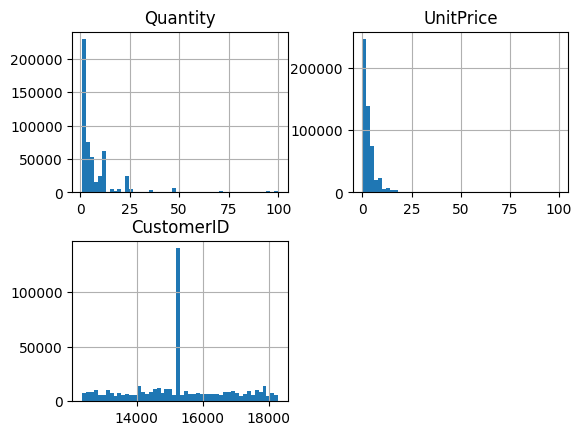

In [3]:
import matplotlib.pyplot as plt

# limit some of the data down and clean it so that we can see values on the graph properly
dataframe = dataframe[dataframe['UnitPrice'] >= 0]
dataframe = dataframe[dataframe['UnitPrice'] <= 100]
dataframe = dataframe[dataframe['Quantity'] >= 0]
dataframe = dataframe[dataframe['Quantity'] <= 100]

dataframe.hist(bins=50)

# Part 2 - Continued
After filtering down the data by limiting values to certain ranges there is definitely one noticable trend. There seems to be much more items of smaller value being purchased, and then as we move toward the 5 to 10 dollar range it quickly drops off. This makes sense as larger more expensive items are not commonly bought in bulk or as frequently.


# Part 3 - What I Want to Predict
Using this dataset I would like to be able to predict the average weekly spending a person might do in a given time of the year. In the dataset it does give us information about the cost value and the time at which a transaction took place. I believe I can use the **InvoiceDate** and **UnitPrice** to calculate the average weekly online spending and then predict values based on those findings. 

New Question: Can I predict someones online weekly spending amounts using previous transaction data?

# Part 4 - Cleaning Up and Adding Calculated Features

In this code cell I am cleaning and adding all kinds of different features that I can use to aid in the predictive powers of my model. Some of the new features that I made include "trans_month", "trans_week", "trans_day", and "total_cost". These features are all calculated from the data that was originally present in the dataset. 

I also created some chart from the cleaned data and new feature that show trends I would expect. For instance the very last scatter plot shows a steady trend of transactions amounts until later in the year. This makes sense as people may be purchases things for the holidays or businesses/people are buying what they can for tax related purposes as they enter the new year. 

trans_day
339    7953
342    7400
340    7043
335    5845
341    5238
       ... 
219     526
353     515
121     447
356     283
37      278
Name: count, Length: 298, dtype: int64


array([[<Axes: xlabel='trans_month', ylabel='trans_month'>,
        <Axes: xlabel='total_cost', ylabel='trans_month'>,
        <Axes: xlabel='trans_week', ylabel='trans_month'>],
       [<Axes: xlabel='trans_month', ylabel='total_cost'>,
        <Axes: xlabel='total_cost', ylabel='total_cost'>,
        <Axes: xlabel='trans_week', ylabel='total_cost'>],
       [<Axes: xlabel='trans_month', ylabel='trans_week'>,
        <Axes: xlabel='total_cost', ylabel='trans_week'>,
        <Axes: xlabel='trans_week', ylabel='trans_week'>]], dtype=object)

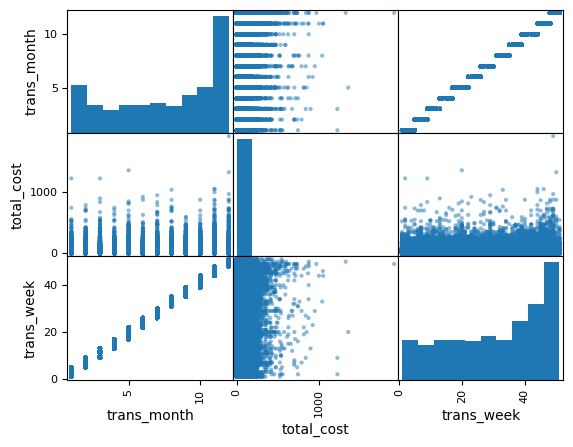

In [4]:
from pandas.plotting import scatter_matrix

working_set = dataframe.copy()

# create new columns containing individual pieces from the InvoiceDate
working_set["InvoiceDate"] = pd.to_datetime(working_set["InvoiceDate"], format='%Y-%m-%d %H:%M:%S')
working_set['trans_month'] = working_set['InvoiceDate'].dt.month
working_set['trans_week'] = working_set['InvoiceDate'].dt.isocalendar().week
working_set["trans_day"] = working_set['InvoiceDate'].dt.dayofyear

print(working_set["trans_day"].value_counts())

#Creating a total_cost feature for each row and limiting the working set to rows that
# contain total cost values less than 2000. This limit gets rid of outliers that greatly increase the graph size
working_set['total_cost'] = working_set['Quantity'] * working_set['UnitPrice']
working_set = working_set[working_set['total_cost'] <= 2000]

# calculate weekly total spending
weekly_total = []
for i in range(1, 53):
    weekly_total.append(working_set[working_set["trans_week"] == i]["UnitPrice"].sum())

# calculate weekly spending average
average_weekly_cost = []
for i in range(1, 53):
    average_weekly_cost.append(working_set[working_set["trans_week"] == i]["UnitPrice"].mean())

# calculate daily spending average
average_daily_cost = []
for i in range(1, 366):
    average_daily_cost.append(working_set[working_set["trans_day"] == i]["UnitPrice"].mean())

# grab the number of transactions per week and day
weekly_transactions = working_set.groupby('trans_week').size()
daily_transactions = working_set.groupby('trans_day').size()

# get daily transactions and fill days that dont have any with NaN
days_range = range(1, 368)
daily_transactions = daily_transactions.reindex(days_range, fill_value=None)

# Create a scatter matrix for comparing/looking at these new calculated values
compare = ["trans_month", "total_cost", "trans_week"]
scatter_matrix(working_set[compare])

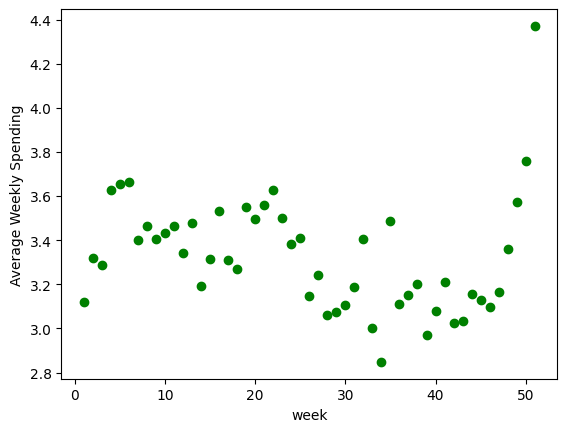

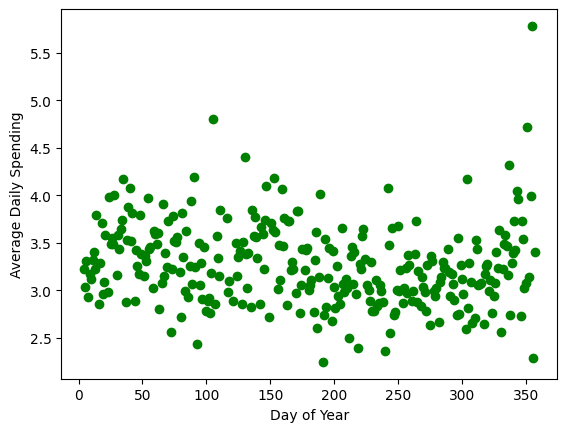

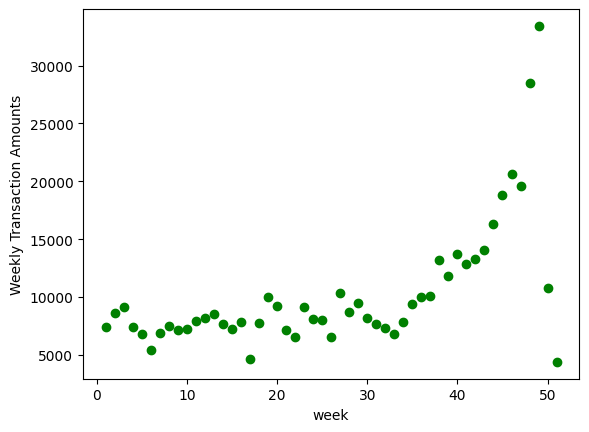

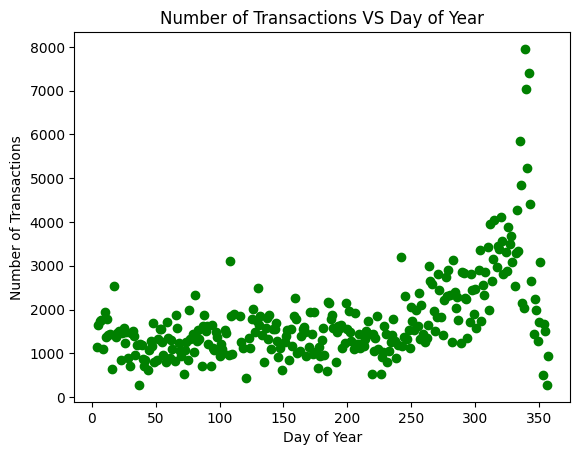

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x=range(1,53), y=average_weekly_cost, marker="o", c="green")
plt.xlabel('week')
plt.ylabel('Average Weekly Spending')
plt.show()
plt.scatter(x=range(1,366), y=average_daily_cost, marker="o", c="green")
plt.xlabel('Day of Year')
plt.ylabel('Average Daily Spending')
plt.show()
plt.scatter(x=range(1,52), y=weekly_transactions, marker="o", c="green")
plt.xlabel('week')
plt.ylabel('Weekly Transaction Amounts')
plt.show()
plt.scatter(x=range(1,368), y=daily_transactions, marker="o", c="green")
plt.xlabel('Day of Year')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions VS Day of Year')
plt.show()

# Part 5 - Creating Training/test Sets

With this data we are ultimately taking many data values, computing metrics off of them (averages, totals, etc) and then graphing that newly created data. For the data above there are between ~50 and ~370 values each, but to calculate those values we used the entire dataset of nearly 550000 data points. My hope is that I can see this same trend without having to limit the datapoints to a small number like the above graphs.

In [163]:
from sklearn.model_selection import train_test_split

# After cleaning and adding features make the working set the dataframe for training/testing
# I want features to be present so that I can perform calculations on them like above. 
dataframe = working_set

# create both sets with a test size of 20 percent
train_set, test_set = train_test_split(dataframe, test_size=0.2, random_state=46)

In [164]:
print(train_set.value_counts())
print("***********************************")
print(test_set.value_counts())

InvoiceNo  StockCode  Description                          Quantity  InvoiceDate          UnitPrice  CustomerID  Country         trans_month  trans_week  trans_day  total_cost
555524     22698      PINK REGENCY TEACUP AND SAUCER       1         2011-06-05 11:37:00  2.95       16923       United Kingdom  6            22          156        2.95          15
           22697      GREEN REGENCY TEACUP AND SAUCER      1         2011-06-05 11:37:00  2.95       16923       United Kingdom  6            22          156        2.95          10
538514     21756      BATH BUILDING BLOCK WORD             1         2010-12-12 14:27:00  5.95       15044       United Kingdom  12           49          346        5.95           6
572344     M          Manual                               48        2011-10-24 10:43:00  1.50       14607       United Kingdom  10           43          297        72.00          6
572861     22775      PURPLE DRAWERKNOB ACRYLIC EDWARDIAN  12        2011-10-26 12:46:00  1.25  